In [5]:
import pandas as pd
import numpy as np

import cv2
import os
import random
from PIL import Image
from tqdm import tqdm
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [8]:
images_list = []
hotel_list = [10129, 310173]
for hotel in hotel_list:
    l = len(os.listdir(f"HotelTraffickingData/horizaontal/train/{hotel}/"))
    for i in range(l):
        data = (f"HotelTraffickingData/horizaontal/train/{hotel}/{i}.png", f"HotelTraffickingData/vertical/train/{hotel}/{i}.png", hotel)
        images_list.append(data)

for hotel in hotel_list:
    l = len(os.listdir(f"HotelTraffickingData/horizaontal/val/{hotel}/"))
    for i in range(l):
        data = (f"HotelTraffickingData/horizaontal/val/{hotel}/{i}.png", f"HotelTraffickingData/vertical/val/{hotel}/{i}.png", hotel)
        images_list.append(data)

for hotel in hotel_list:
    l = len(os.listdir(f"HotelTraffickingData/horizaontal/test/{hotel}/"))
    for i in range(l):
        data = (f"HotelTraffickingData/horizaontal/test/{hotel}/{i}.png", f"HotelTraffickingData/vertical/test/{hotel}/{i}.png", hotel)
        images_list.append(data)

random.shuffle(images_list)

try:
    os.mkdir("HotelTraffickingData/New Data/")
    os.mkdir("HotelTraffickingData/New Data/train")
    os.mkdir("HotelTraffickingData/New Data/val")
    os.mkdir("HotelTraffickingData/New Data/test")
except FileExistsError:
    pass

for hotel in hotel_list:
    try:
        os.mkdir(f"HotelTraffickingData/New Data/train/{hotel}")
        os.mkdir(f"HotelTraffickingData/New Data/val/{hotel}")
        os.mkdir(f"HotelTraffickingData/New Data/test/{hotel}")
    except FileExistsError:
        pass

for images in tqdm(images_list):
    image_p1, image_p2, label = images
    # print(images)
    im1 = Image.open(image_p1)
    im2 = Image.open(image_p2)
    image = Image.blend(im1, im2, 0.5)

    image_p1 = image_p1.split("/")
    h = image_p1[-2] 
    n = image_p1[-1].split(".")[0]
    k = image_p1[-3]

    image.save(f"HotelTraffickingData/New Data/{k}/{h}/{n}.png")
    image = cv2.imread(f"HotelTraffickingData/New Data/{k}/{h}/{n}.png")
    image = cv2.resize(image, (256, 256))
    cv2.imwrite(f"HotelTraffickingData/New Data/{k}/{h}/{n}.png", image)

  3%|▎         | 553/20000 [04:18<2:31:34,  2.14it/s]


KeyboardInterrupt: 

In [9]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "HotelTraffickingData/New Data/train",
  image_size=(256, 256),
  batch_size=32,
  labels='inferred',
  label_mode='int'
)

val_ds= tf.keras.preprocessing.image_dataset_from_directory(
  "HotelTraffickingData/New Data/val",
  image_size=(256, 256),
  batch_size=32,
  labels='inferred',
  label_mode='int'
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "HotelTraffickingData/New Data/test",
  image_size=(256, 256),
  batch_size=32,
  labels='inferred',
  label_mode='int'
)

Found 380 files belonging to 2 classes.
Found 60 files belonging to 2 classes.
Found 114 files belonging to 2 classes.


2023-11-17 21:43:11.800032: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-11-17 21:43:11.800060: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-11-17 21:43:11.800063: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-11-17 21:43:11.800396: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-17 21:43:11.800721: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


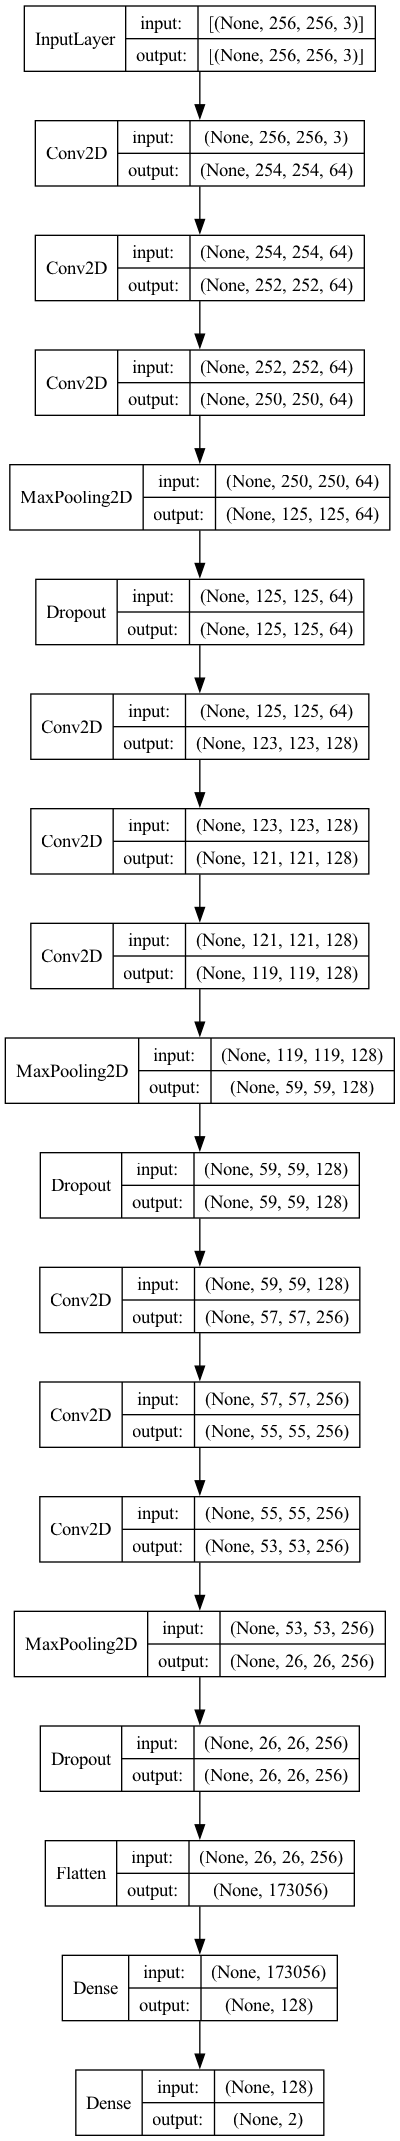

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),

    tf.keras.layers.MaxPooling2D(strides=(2, 2)),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),

    tf.keras.layers.MaxPooling2D(strides=(2, 2)),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu'),

    tf.keras.layers.MaxPooling2D(strides=(2, 2)),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

tf.keras.utils.plot_model(model, show_layer_names = False, show_shapes = True)

In [15]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['Accuracy']
)

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 64)      1792      
                                                                 
 conv2d_7 (Conv2D)           (None, 252, 252, 64)      36928     
                                                                 
 conv2d_8 (Conv2D)           (None, 250, 250, 64)      36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 125, 125, 64)      0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 125, 125, 64)      0         
                                                                 
 conv2d_9 (Conv2D)           (None, 123, 123, 128)     73856     
                                                      

In [19]:
epochs=10
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[callback]
)

Epoch 1/10


12/12 [==============================] - 12s 944ms/step - loss: 2425.6675 - Accuracy: 0.6553 - val_loss: 3410.4827 - val_Accuracy: 0.4500
Epoch 2/10
12/12 [==============================] - 12s 921ms/step - loss: 1797.3610 - Accuracy: 0.6579 - val_loss: 5232.1724 - val_Accuracy: 0.4167
Epoch 3/10
12/12 [==============================] - 12s 920ms/step - loss: 3640.6641 - Accuracy: 0.6184 - val_loss: 6336.6533 - val_Accuracy: 0.4500
Epoch 4/10
12/12 [==============================] - 11s 918ms/step - loss: 2712.0759 - Accuracy: 0.6289 - val_loss: 991.4968 - val_Accuracy: 0.7333
Epoch 5/10
12/12 [==============================] - 11s 915ms/step - loss: 2298.9199 - Accuracy: 0.6053 - val_loss: 2158.2151 - val_Accuracy: 0.5500


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['Accuracy']
)